<a href="https://colab.research.google.com/github/zahrah88/FYP/blob/main/FYPpythoncode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Prompt the user to upload the datasets
print("Upload the Student_Performance.csv file.")
uploaded_student_performance = files.upload()

print("Upload the StudentPerformanceFactors.csv file.")
uploaded_student_factors = files.upload()

print("Upload the EDI Dummy data.csv file.")
uploaded_edi_data = files.upload()

# Load the datasets into Pandas DataFrames
student_performance_df = pd.read_csv('Student_Performance.csv')
student_factors_df = pd.read_csv('StudentPerformanceFactors.csv')
edi_dummy_data_df = pd.read_csv('EDI Dummy data.csv')

# Display the first few rows of each dataset
print("Student Performance Dataset:")
print(student_performance_df.head())

print("\nStudent Performance Factors Dataset:")
print(student_factors_df.head())

print("\nEDI Dummy Data:")
print(edi_dummy_data_df.head())


Upload the Student_Performance.csv file.


Saving Student_Performance.csv to Student_Performance.csv
Upload the StudentPerformanceFactors.csv file.


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv
Upload the EDI Dummy data.csv file.


Saving EDI Dummy data.csv to EDI Dummy data.csv
Student Performance Dataset:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Student Performance Factors Dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0      

Upload the dataset file.


Saving Student_Performance.csv to Student_Performance (1).csv


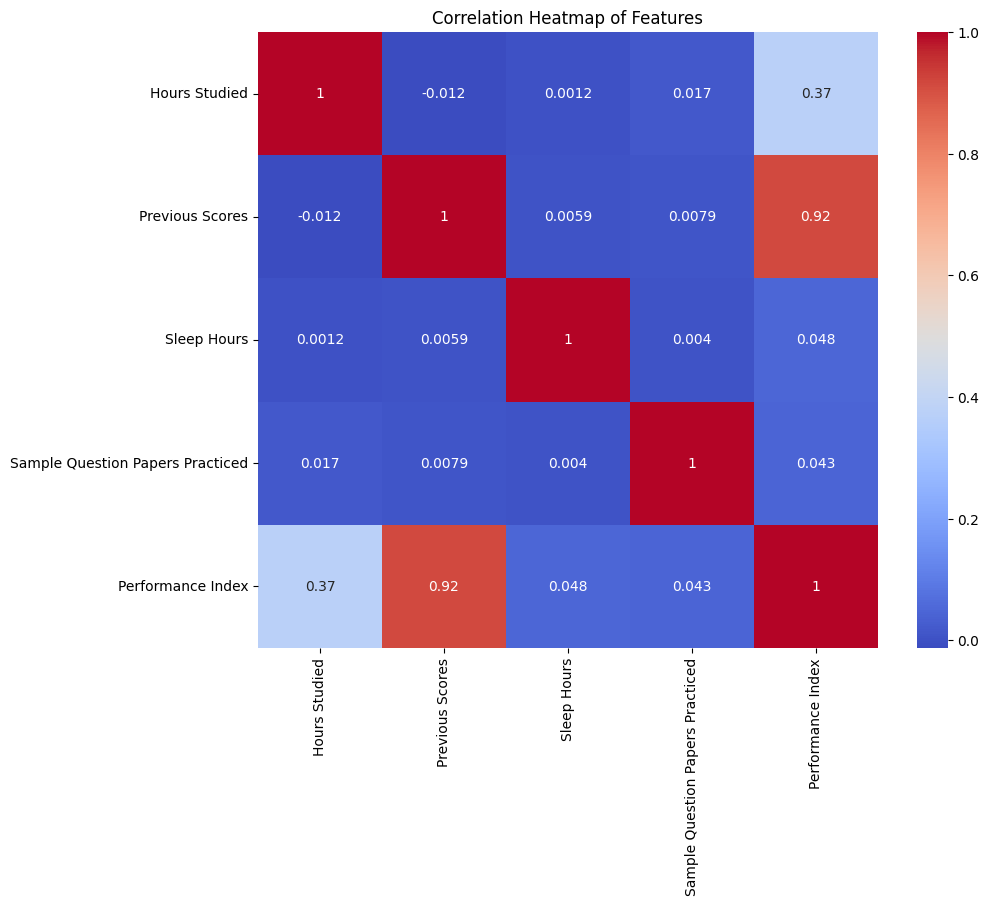

Cleaned dataset saved as 'Cleaned_Student_Performance.csv'.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
print("Upload the dataset file.")
from google.colab import files
uploaded = files.upload()

# Replace 'Student_Performance.csv' with the actual filename
student_performance = pd.read_csv('Student_Performance.csv')

# --- Data Cleaning ---

# 1. Handling Missing Values
# Numerical columns: Use mean imputation
num_imputer = SimpleImputer(strategy='mean')
numerical_cols = student_performance.select_dtypes(include=['float64', 'int64']).columns
student_performance[numerical_cols] = num_imputer.fit_transform(student_performance[numerical_cols])

# Categorical columns: Use mode imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = student_performance.select_dtypes(include=['object']).columns
student_performance[categorical_cols] = cat_imputer.fit_transform(student_performance[categorical_cols])

# 2. Encoding Categorical Variables
# Binary Encoding for columns with 'Yes'/'No'
binary_cols = ['Binary_Column_1', 'Binary_Column_2']  # Replace with actual column names
for col in binary_cols:
    if col in student_performance.columns:
        student_performance[col] = student_performance[col].map({'Yes': 1, 'No': 0})

# One-Hot Encoding for non-ordinal categorical variables
one_hot_cols = ['Parental_Education', 'Socioeconomic_Status']  # Replace with actual column names
if all(col in student_performance.columns for col in one_hot_cols):
    one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
    one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(student_performance[one_hot_cols]),
                                   columns=one_hot_encoder.get_feature_names_out(one_hot_cols))
    student_performance = pd.concat([student_performance.drop(columns=one_hot_cols), one_hot_encoded], axis=1)

# Ordinal Encoding for ordinal categorical variables
ordinal_cols = ['Language_Proficiency_Level']  # Replace with actual column names
if all(col in student_performance.columns for col in ordinal_cols):
    ordinal_mapping = [['Beginner', 'Intermediate', 'Advanced']]  # Replace with appropriate levels
    ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)
    student_performance[ordinal_cols] = ordinal_encoder.fit_transform(student_performance[ordinal_cols])

# 3. Normalizing Numerical Variables
scaler = StandardScaler()
student_performance[numerical_cols] = scaler.fit_transform(student_performance[numerical_cols])

# --- Exploratory Data Analysis (EDA) ---

# Example: Correlation heatmap (exclude non-numeric columns)
numeric_cols = student_performance.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = student_performance[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Example: Distribution of attendance
if 'Attendance' in student_performance.columns:
    sns.histplot(student_performance['Attendance'], kde=True, color='blue')
    plt.title('Distribution of Attendance')
    plt.xlabel('Attendance (%)')
    plt.ylabel('Frequency')
    plt.show()

# Example: Boxplot for performance across socioeconomic categories
if 'Socioeconomic_Status_High' in student_performance.columns and 'Performance' in student_performance.columns:
    sns.boxplot(x='Socioeconomic_Status_High', y='Performance', data=student_performance)
    plt.title('Performance Across Socioeconomic Status')
    plt.xlabel('Socioeconomic Status (High)')
    plt.ylabel('Performance')
    plt.show()

# Save cleaned dataset for further analysis
student_performance.to_csv('Cleaned_Student_Performance.csv', index=False)
print("Cleaned dataset saved as 'Cleaned_Student_Performance.csv'.")


Upload the StudentPerformanceFactors.csv file.


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (1).csv


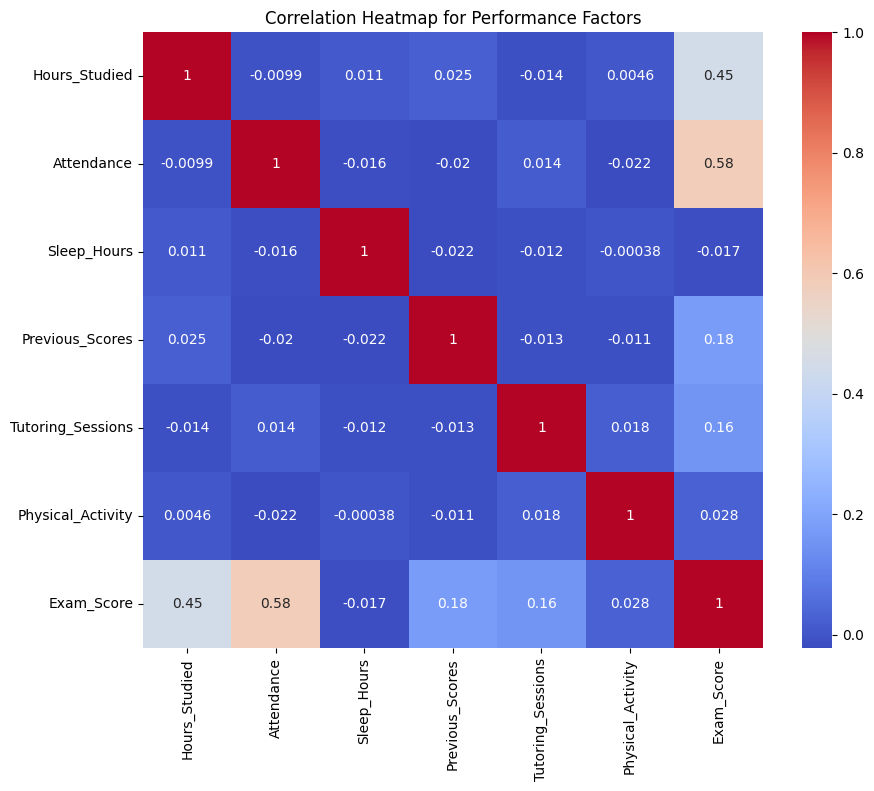

Cleaned dataset saved as 'Cleaned_StudentPerformanceFactors.csv'.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
print("Upload the StudentPerformanceFactors.csv file.")
from google.colab import files
uploaded = files.upload()

# Replace 'StudentPerformanceFactors.csv' with the actual filename
performance_factors = pd.read_csv('StudentPerformanceFactors.csv')

# --- Data Cleaning ---

# 1. Handling Missing Values
# Numerical columns: Use mean imputation
num_imputer = SimpleImputer(strategy='mean')
numerical_cols = performance_factors.select_dtypes(include=['float64', 'int64']).columns
performance_factors[numerical_cols] = num_imputer.fit_transform(performance_factors[numerical_cols])

# Categorical columns: Use mode imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = performance_factors.select_dtypes(include=['object']).columns
performance_factors[categorical_cols] = cat_imputer.fit_transform(performance_factors[categorical_cols])

# 2. Encoding Categorical Variables
# One-Hot Encoding for non-ordinal categorical variables
one_hot_cols = ['Factor_Category']  # Replace with actual column names
if all(col in performance_factors.columns for col in one_hot_cols):
    one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
    one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(performance_factors[one_hot_cols]),
                                   columns=one_hot_encoder.get_feature_names_out(one_hot_cols))
    performance_factors = pd.concat([performance_factors.drop(columns=one_hot_cols), one_hot_encoded], axis=1)

# Ordinal Encoding for ordinal categorical variables
ordinal_cols = ['Factor_Level']  # Replace with actual column names
ordinal_mapping = [['Low', 'Medium', 'High']]  # Replace with appropriate levels
if all(col in performance_factors.columns for col in ordinal_cols):
    ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)
    performance_factors[ordinal_cols] = ordinal_encoder.fit_transform(performance_factors[ordinal_cols])

# 3. Normalizing Numerical Variables
scaler = StandardScaler()
performance_factors[numerical_cols] = scaler.fit_transform(performance_factors[numerical_cols])

# --- Exploratory Data Analysis (EDA) ---

# Correlation heatmap (only for numerical columns)
numerical_cols = performance_factors.select_dtypes(include=['float64', 'int64']).columns

# Ensure there are numerical columns before attempting to plot
if not numerical_cols.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(performance_factors[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap for Performance Factors')
    plt.show()
else:
    print("No numerical columns found for correlation heatmap.")

# Example: Barplot for factor levels
if 'Factor_Level' in performance_factors.columns:
    sns.countplot(x='Factor_Level', data=performance_factors)
    plt.title('Count of Factor Levels')
    plt.xlabel('Factor Level')
    plt.ylabel('Frequency')
    plt.show()

# Save cleaned dataset for further analysis
performance_factors.to_csv('Cleaned_StudentPerformanceFactors.csv', index=False)
print("Cleaned dataset saved as 'Cleaned_StudentPerformanceFactors.csv'.")


Upload the EDI Dummy data.csv file.


Saving EDI Dummy data.csv to EDI Dummy data (1).csv


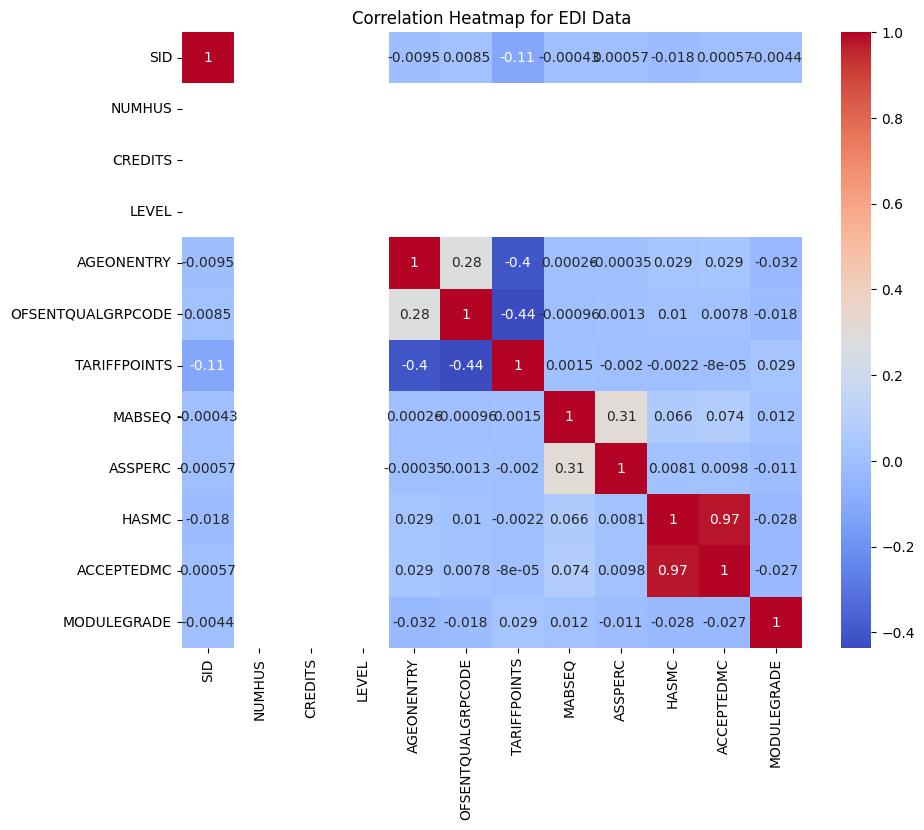

Cleaned dataset saved as 'Cleaned_EDI_Dummy_Data.csv'.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
print("Upload the EDI Dummy data.csv file.")
from google.colab import files
uploaded = files.upload()

# Replace 'EDI Dummy data.csv' with the actual filename
edi_data = pd.read_csv('EDI Dummy data.csv')

# --- Data Cleaning ---

# 1. Handling Missing Values
# Numerical columns: Use mean imputation
num_imputer = SimpleImputer(strategy='mean')
numerical_cols = edi_data.select_dtypes(include=['float64', 'int64']).columns
edi_data[numerical_cols] = num_imputer.fit_transform(edi_data[numerical_cols])

# Categorical columns: Use mode imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = edi_data.select_dtypes(include=['object']).columns
edi_data[categorical_cols] = cat_imputer.fit_transform(edi_data[categorical_cols])

# 2. Encoding Categorical Variables
# One-Hot Encoding for non-ordinal categorical variables
one_hot_cols = ['Ethnicity', 'Disability_Type']  # Replace with actual column names
if all(col in edi_data.columns for col in one_hot_cols):
    one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
    one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(edi_data[one_hot_cols]),
                                   columns=one_hot_encoder.get_feature_names_out(one_hot_cols))
    edi_data = pd.concat([edi_data.drop(columns=one_hot_cols), one_hot_encoded], axis=1)

# Ordinal Encoding for ordinal categorical variables
ordinal_cols = ['Proficiency_Level']  # Replace with actual column names
ordinal_mapping = [['Beginner', 'Intermediate', 'Advanced']]  # Replace with appropriate levels
if all(col in edi_data.columns for col in ordinal_cols):
    ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)
    edi_data[ordinal_cols] = ordinal_encoder.fit_transform(edi_data[ordinal_cols])

# 3. Normalizing Numerical Variables
scaler = StandardScaler()
edi_data[numerical_cols] = scaler.fit_transform(edi_data[numerical_cols])

# --- Exploratory Data Analysis (EDA) ---

# Correlation heatmap (only for numerical columns)
numerical_cols = edi_data.select_dtypes(include=['float64', 'int64']).columns

if not numerical_cols.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(edi_data[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap for EDI Data')
    plt.show()
else:
    print("No numerical columns found for correlation heatmap.")

# Example: Distribution of Age
if 'Age' in edi_data.columns:
    sns.histplot(edi_data['Age'], kde=True, color='blue')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Example: Countplot for Disability Type
if 'Disability_Type' in edi_data.columns:
    sns.countplot(x='Disability_Type', data=edi_data)
    plt.title('Count of Disability Types')
    plt.xlabel('Disability Type')
    plt.ylabel('Frequency')
    plt.show()

# Save cleaned dataset for further analysis
edi_data.to_csv('Cleaned_EDI_Dummy_Data.csv', index=False)
print("Cleaned dataset saved as 'Cleaned_EDI_Dummy_Data.csv'.")


Available files in the current directory:
['.config', 'Student_Performance.csv', 'Cleaned_Student_Performance.csv', 'StudentPerformanceFactors (1).csv', 'Student_Performance (1).csv', 'StudentPerformanceFactors.csv', 'Cleaned_EDI_Dummy_Data.csv', 'EDI Dummy data.csv', 'EDI Dummy data (1).csv', 'Cleaned_StudentPerformanceFactors.csv', 'sample_data']

--- EDI Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENTYEARMODULE   2528 non-null   object 
 1   SID                 2528 non-null   float64
 2   NUMHUS              2528 non-null   float64
 3   COURSETITLE         2528 non-null   object 
 4   MODULENAME          2528 non-null   object 
 5   CREDITS             2528 non-null   float64
 6   LEVEL               2528 non-null   float64
 7   SEMESTER            2528 non-null   object 
 8   AGEONENTRY          2528 non-

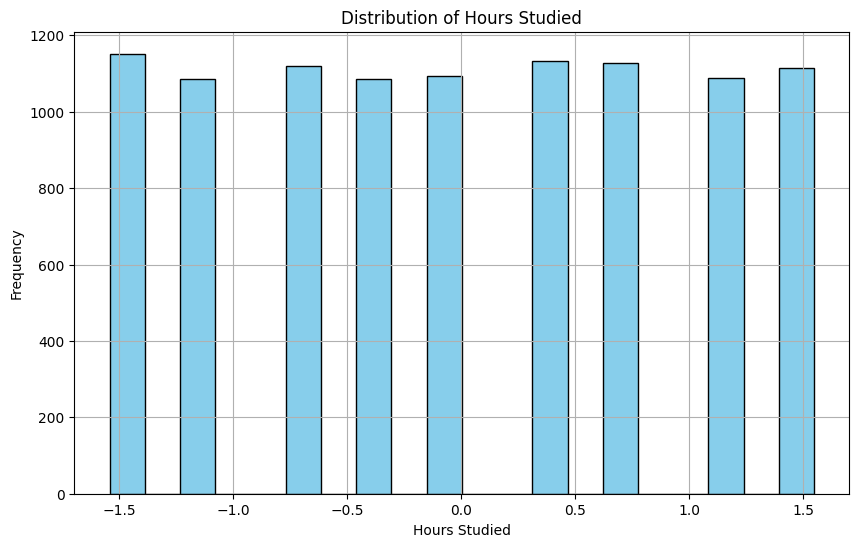


Frequency Counts for Extracurricular Activities:
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


<ipython-input-5-0bd939b18750>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_performance_df, x='Extracurricular Activities', palette='Set2')


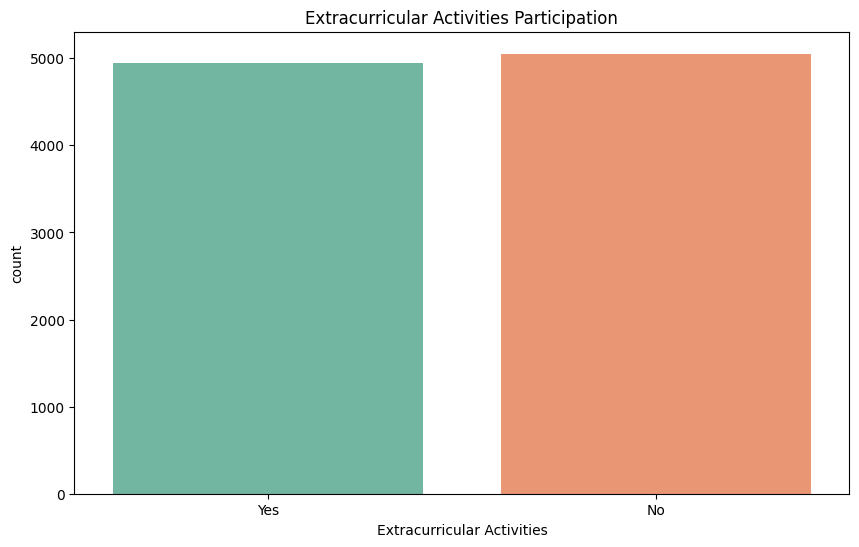

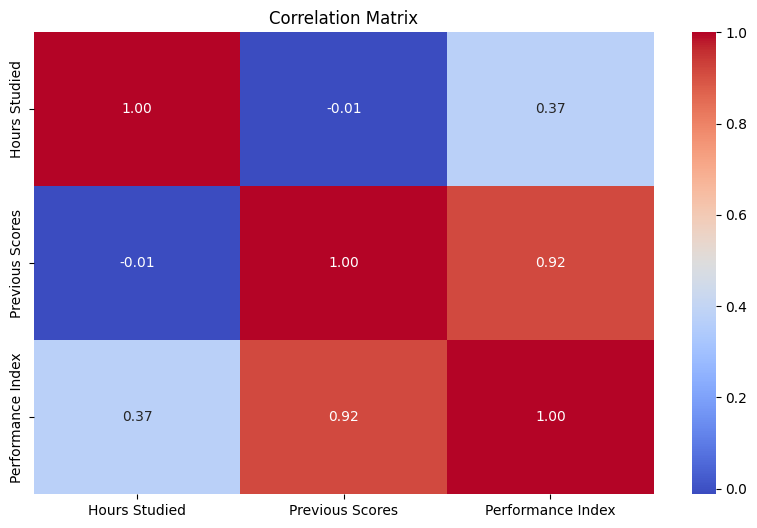

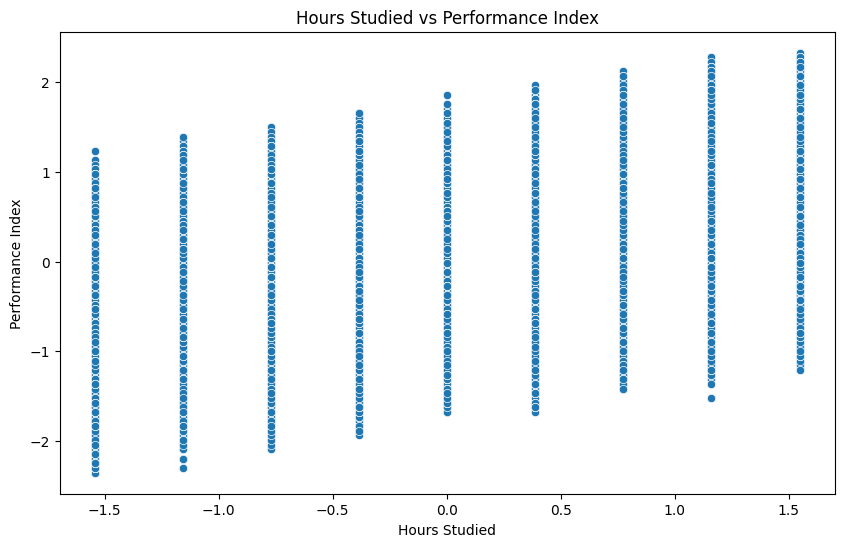

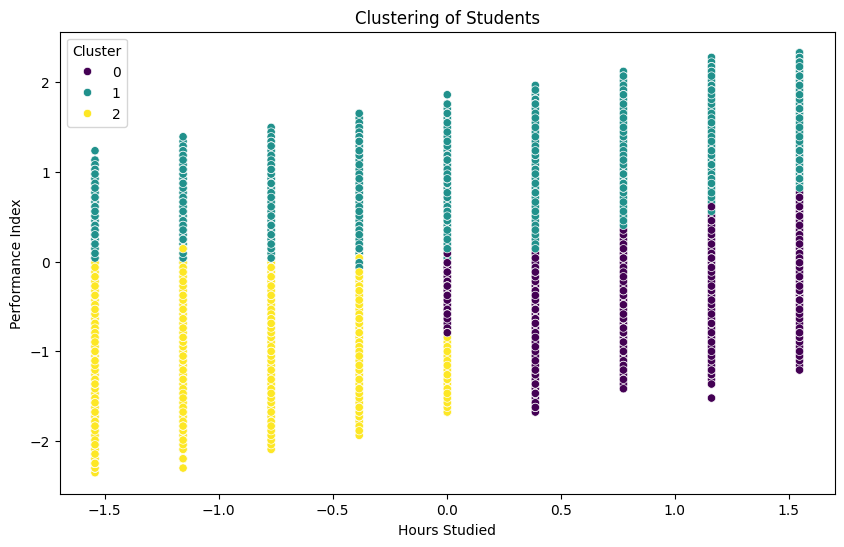

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 1: Check the available files in your Colab environment
import os
print("Available files in the current directory:")
print(os.listdir())

# Step 2: Load the cleaned datasets
# Replace these file names with the actual names of your saved datasets
edi_data_path = 'Cleaned_EDI_Dummy_Data.csv'
student_performance_path = 'Cleaned_Student_Performance.csv'
student_factors_path = 'Cleaned_StudentPerformanceFactors.csv'

# Load datasets into DataFrames
edi_data_df = pd.read_csv(edi_data_path)
student_performance_df = pd.read_csv(student_performance_path)
student_factors_df = pd.read_csv(student_factors_path)

# Display a quick overview of the datasets
print("\n--- EDI Data ---")
print(edi_data_df.info())
print(edi_data_df.head())

print("\n--- Student Performance Data ---")
print(student_performance_df.info())
print(student_performance_df.head())

print("\n--- Student Factors Data ---")
print(student_factors_df.info())
print(student_factors_df.head())

# --- Exploratory Data Analysis (EDA) ---

# --- Univariate Analysis ---
# Example: Summary statistics for numerical variables in the student performance dataset
print("\nSummary Statistics for Student Performance Dataset:")
print(student_performance_df.describe())

# Example: Histogram for 'Hours Studied' from the student performance dataset
if 'Hours Studied' in student_performance_df.columns:
    plt.figure(figsize=(10, 6))
    student_performance_df['Hours Studied'].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Hours Studied')
    plt.xlabel('Hours Studied')
    plt.ylabel('Frequency')
    plt.show()

# --- Categorical Analysis ---
# Frequency counts for categorical columns (e.g., 'Extracurricular Activities')
if 'Extracurricular Activities' in student_performance_df.columns:
    print("\nFrequency Counts for Extracurricular Activities:")
    print(student_performance_df['Extracurricular Activities'].value_counts())

    # Bar chart for 'Extracurricular Activities'
    plt.figure(figsize=(10, 6))
    sns.countplot(data=student_performance_df, x='Extracurricular Activities', palette='Set2')
    plt.title('Extracurricular Activities Participation')
    plt.show()

# --- Multivariate Analysis ---
# Correlation matrix for numerical variables
numeric_columns = ['Hours Studied', 'Previous Scores', 'Performance Index']  # Adjust based on your dataset
if all(col in student_performance_df.columns for col in numeric_columns):
    corr = student_performance_df[numeric_columns].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

# Scatter plot for 'Hours Studied' vs 'Performance Index'
if 'Hours Studied' in student_performance_df.columns and 'Performance Index' in student_performance_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=student_performance_df, x='Hours Studied', y='Performance Index')
    plt.title('Hours Studied vs Performance Index')
    plt.show()

# --- Optional: K-Means Clustering ---
# Example clustering using selected numerical columns
if all(col in student_performance_df.columns for col in numeric_columns):
    kmeans = KMeans(n_clusters=3, random_state=42)
    student_performance_df['Cluster'] = kmeans.fit_predict(student_performance_df[numeric_columns])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=student_performance_df, x='Hours Studied', y='Performance Index', hue='Cluster', palette='viridis')
    plt.title('Clustering of Students')
    plt.show()


<ipython-input-6-e08f6cec7447>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_performance, x="Performance Index", palette="viridis")


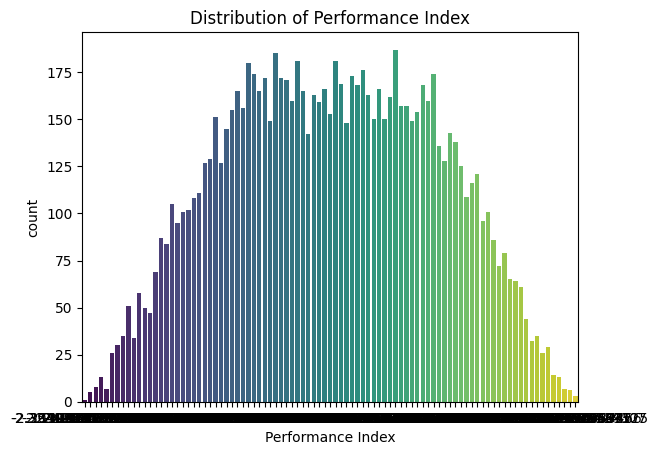

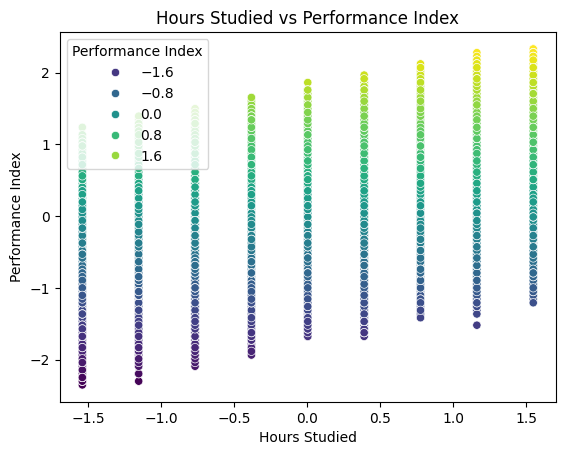

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for categorical data: Performance Index
sns.countplot(data=student_performance, x="Performance Index", palette="viridis")
plt.title("Distribution of Performance Index")
plt.show()

# Scatterplot: Hours Studied vs Performance Index
sns.scatterplot(data=student_performance, x="Hours Studied", y="Performance Index", hue="Performance Index", palette="viridis")
plt.title("Hours Studied vs Performance Index")
plt.show()


In [7]:
import statsmodels.api as sm

# Define the independent variables (e.g., Hours Studied, Sleep Hours)
X = student_performance[['Hours Studied', 'Sleep Hours', 'Previous Scores']]
X = sm.add_constant(X)  # Add constant for intercept

# Define the dependent variable (Performance Index)
y = student_performance['Performance Index']

# Run the regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.665e+05
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:58:02   Log-Likelihood:                 7781.0
No. Observations:               10000   AIC:                        -1.555e+04
Df Residuals:                    9996   BIC:                        -1.553e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.25e-17      0.001   3.

Dataset loaded successfully!
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0       0.775188         1.704176                        Yes     1.456205   
1      -0.383481         0.723913                         No    -1.492294   
2       1.161410        -1.063626                        Yes     0.276805   
3       0.002742        -1.005963                        Yes    -0.902594   
4       0.775188         0.320275                         No     0.866505   

   Sample Question Papers Practiced  Performance Index  
0                         -1.249754           1.862167  
1                         -0.900982           0.508818  
2                         -0.900982          -0.532220  
3                         -0.900982          -1.000687  
4                          0.145333           0.560870  

Columns in the dataset:
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performan

<ipython-input-8-f23a9041ca13>:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=student_performance_cleaned, x="Performance Index", kde=False, bins=20, palette="viridis")  # Adjusted bins to 20


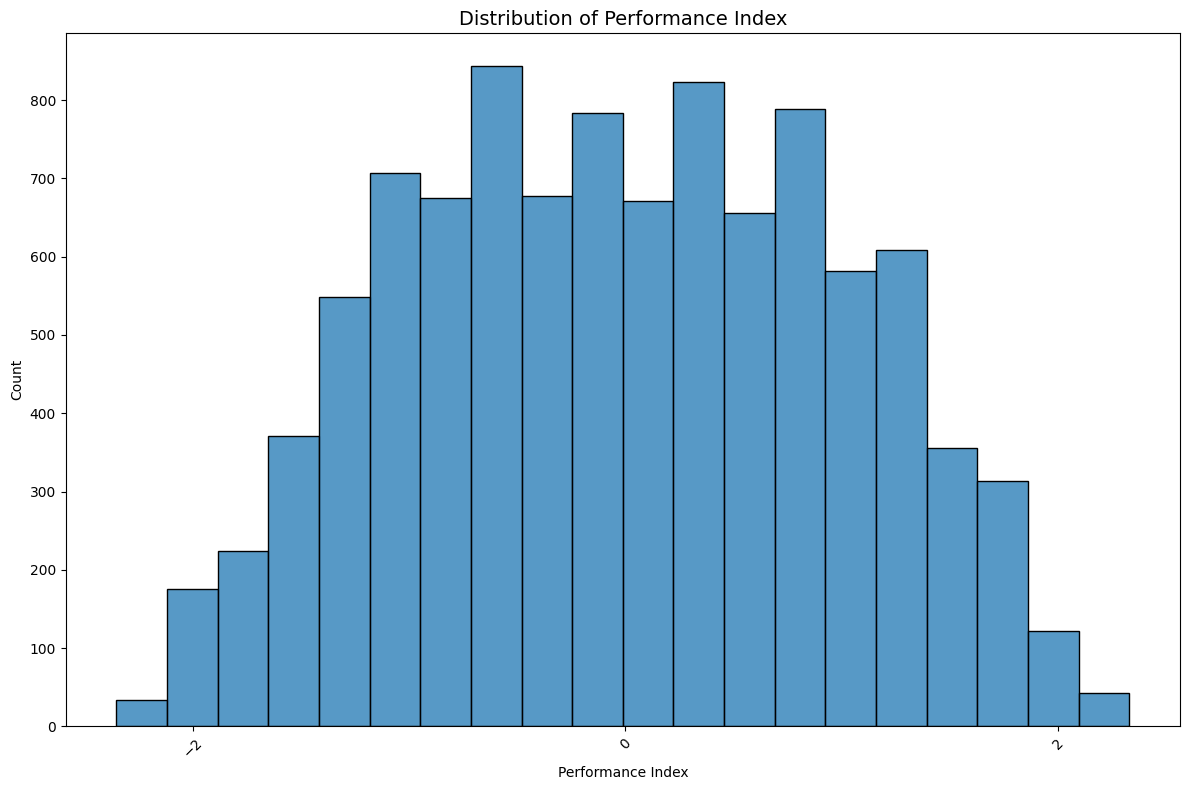

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the cleaned dataset
try:
    # Load the cleaned student performance dataset
    student_performance_cleaned = pd.read_csv("Cleaned_Student_Performance.csv")

    # Check the first few rows to confirm
    print("Dataset loaded successfully!")
    print(student_performance_cleaned.head())
except FileNotFoundError:
    print("Error: File 'Cleaned_Student_Performance.csv' not found. Please check the file path.")
    exit()

# Step 2: Verify column names
print("\nColumns in the dataset:")
print(student_performance_cleaned.columns)

# Ensure column names are clean and standardized
student_performance_cleaned.columns = student_performance_cleaned.columns.str.strip()

# Check for the 'Performance Index' column
if "Performance Index" not in student_performance_cleaned.columns:
    print("\nError: 'Performance Index' column not found in the dataset.")
    exit()

# Bar plot: Distribution of Performance Index
plt.figure(figsize=(12, 8))
sns.histplot(data=student_performance_cleaned, x="Performance Index", kde=False, bins=20, palette="viridis")  # Adjusted bins to 20
plt.title("Distribution of Performance Index", fontsize=14)
plt.xlabel("Performance Index")
plt.ylabel("Count")
plt.xticks(ticks=range(int(student_performance_cleaned["Performance Index"].min()),
                       int(student_performance_cleaned["Performance Index"].max()) + 1, 2), rotation=45)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned datasets
student_performance_df = pd.read_csv("Cleaned_Student_Performance.csv")
student_factors_df = pd.read_csv("Cleaned_StudentPerformanceFactors.csv")
edi_dummy_data_df = pd.read_csv("Cleaned_EDI_Dummy_Data.csv")

# ---------------- Student Performance Dataset ----------------
# Identify features (X) and target (y)
X_performance = student_performance_df.drop(columns=['Performance Index'])  # Drop target column
y_performance = student_performance_df['Performance Index']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_performance, y_performance, test_size=0.2, random_state=42)

# Save the splits
X_train_perf.to_csv("X_train_performance.csv", index=False)
X_test_perf.to_csv("X_test_performance.csv", index=False)
y_train_perf.to_csv("y_train_performance.csv", index=False)
y_test_perf.to_csv("y_test_performance.csv", index=False)

# ---------------- Student Factors Dataset ----------------
# Identify features and target
X_factors = student_factors_df.drop(columns=['Exam_Score'])  # Drop target column
y_factors = student_factors_df['Exam_Score']  # Target variable

# Split into training and testing sets
X_train_factors, X_test_factors, y_train_factors, y_test_factors = train_test_split(X_factors, y_factors, test_size=0.2, random_state=42)

# Save the splits
X_train_factors.to_csv("X_train_factors.csv", index=False)
X_test_factors.to_csv("X_test_factors.csv", index=False)
y_train_factors.to_csv("y_train_factors.csv", index=False)
y_test_factors.to_csv("y_test_factors.csv", index=False)

# ---------------- EDI Dataset ----------------
# Identify features and target
X_edi = edi_dummy_data_df.drop(columns=['MODULEGRADE'])  # Drop target column
y_edi = edi_dummy_data_df['MODULEGRADE']  # Target variable

# Split into training and testing sets
X_train_edi, X_test_edi, y_train_edi, y_test_edi = train_test_split(X_edi, y_edi, test_size=0.2, random_state=42)

# Save the splits
X_train_edi.to_csv("X_train_edi.csv", index=False)
X_test_edi.to_csv("X_test_edi.csv", index=False)
y_train_edi.to_csv("y_train_edi.csv", index=False)
y_test_edi.to_csv("y_test_edi.csv", index=False)

print("Datasets have been successfully split and saved!")


Datasets have been successfully split and saved!


In [11]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("Cleaned_Student_Performance.csv")

# Step 1: Convert Performance Index into High (1) and Low (0)
df['Performance_Category'] = df['Performance Index'].apply(lambda x: 1 if x >= df['Performance Index'].median() else 0)

# Step 2: Handle Categorical Variables
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode Binary Variables (e.g., 'Yes' -> 1, 'No' -> 0)
binary_cols = ['Extracurricular Activities', 'Internet Access']  # Replace with actual binary column names
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-Hot Encoding for other categorical variables
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col not in binary_cols], drop_first=True)

# Step 3: Select Features and Target
X = df.drop(columns=['Performance Index', 'Performance_Category'])  # Features
y = df['Performance_Category']  # Target

# Step 4: Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Model Accuracy: 0.97

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       997
           1       0.97      0.97      0.97      1003

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


📌 Confusion Matrix:
[[967  30]
 [ 27 976]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


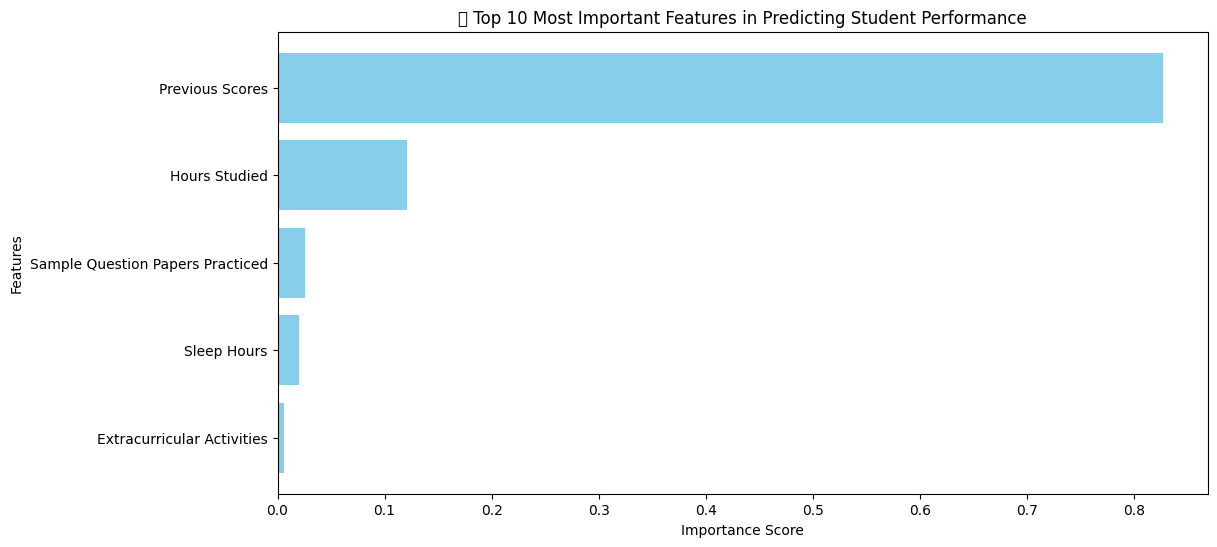

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')  # Top 10 features
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("🔍 Top 10 Most Important Features in Predicting Student Performance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"✅ Best Hyperparameters: {grid_search.best_params_}")

# Train model with best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate
y_pred_best = best_rf.predict(X_test)
print(f"✅ Updated Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")


✅ Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
✅ Updated Accuracy: 0.97


In [15]:
student_performance_df['Predicted_Performance'] = rf_classifier.predict(X)
student_performance_df.to_csv("Student_Performance_With_Predictions.csv", index=False)
print("✅ Predictions saved!")


✅ Predictions saved!


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


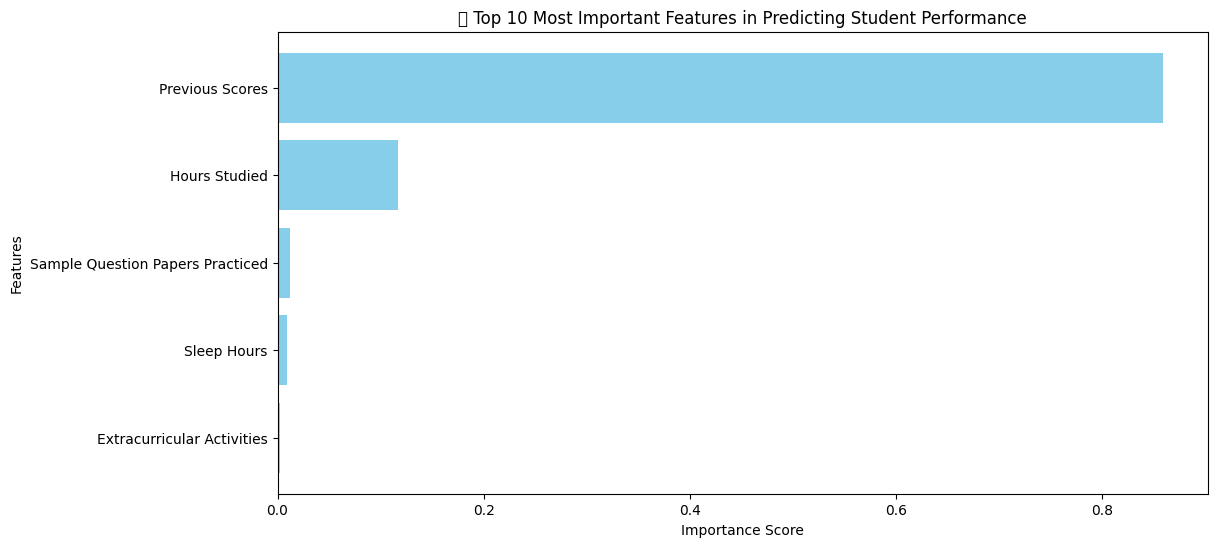

In [17]:
#This will show which factors
# (e.g., attendance, study hours, parental involvement) contribute most to student success
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the optimized model
feature_importance = best_rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')  # Top 10 features
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("🔍 Top 10 Most Important Features in Predicting Student Performance")
plt.gca().invert_yaxis()  # Corrected line: Inverts y-axis for better readability
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


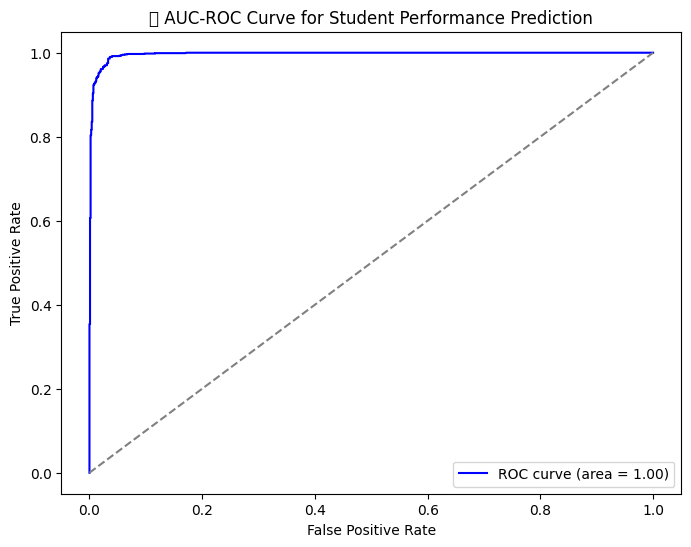

In [18]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 AUC-ROC Curve for Student Performance Prediction")
plt.legend(loc="lower right")
plt.show()


In [19]:
import joblib

# Save the trained model
joblib.dump(best_rf, "random_forest_student_performance.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!
